# Import the modules needed for this task

In [1]:
# numpy, pandas, scipy, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


# cross validation??
from sklearn.model_selection import train_test_split

# import data (cleaned. see EDA)

In [2]:
rawData = pd.read_csv('creditEDA.csv')
rawData.head()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,3,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,3,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,3,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,3,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,3,0,0,0,1


# Examine the structure of my data

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   credit                     30000 non-null  int64
 1   SEX                        30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

In [4]:
rawData.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [5]:
rawData.describe()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,1.598100,0.352833,0.163900,0.015600,0.467667
std,129747.661567,0.489129,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,1.371656,0.477859,0.370191,0.123924,0.498962
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#  Select the features

In [6]:
# features: the 7 variables have larger pearson coefficients ----see EDA

X = rawData.loc[:, ['default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]
                    
print('Summary of feature sample')
X.head()

Summary of feature sample


,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6
0,1,24,1,0,2,0,0
1,1,26,2,0,2,3455,2000
2,0,34,2,0,0,14948,5000
3,0,37,1,0,0,28959,1000
4,0,57,1,0,0,19146,679


In [ ]:
#features

X = rawData.iloc[:,[2,3,5,14,21,22,24]]
print('Summary of feature sample')
X.head()

# Select the Dependent Variable

In [7]:
#dependent variable
y = rawData['credit']

## double-check that the correct column is being used

In [8]:
print(X)

       default  AGE  MARRIAGE  EDUCATION_graduate school  PAY_2  BILL_AMT5  \
0            1   24         1                          0      2          0   
1            1   26         2                          0      2       3455   
2            0   34         2                          0      0      14948   
3            0   37         1                          0      0      28959   
4            0   57         1                          0      0      19146   
...        ...  ...       ...                        ...    ...        ...   
29995        0   39         1                          0      0      31237   
29996        0   43         2                          0     -1       5190   
29997        1   37         2                          0      3      20582   
29998        1   41         1                          0     -1      11855   
29999        1   46         1                          0      0      32428   

       PAY_AMT6  
0             0  
1          2000  
2        

In [9]:
#dependent variable
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: credit, Length: 30000, dtype: int64


#  Building the Models and Choosing the Right Model

### build more than one model in order to find the most appropriate one for the job

## Modeling Format:
### prepare each regression algorithm for use 

In [10]:
algosClass = []

In [11]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [12]:
algosClass.append(('Linear Regression',LinearRegression()))

In [13]:
algosClass.append(('Support Vector Regression',SVR()))

In [14]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [15]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.3605401264433903
Linear Regression 0.30485340464174787
Support Vector Regression -0.05103950390038747


## chosen RandomForestRegressor (highest score) to use and trained it 


## move on to making predictions.

In [16]:
#Train/Test Split   ################## C1T2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [18]:
X_train.shape, X_test.shape

((21000, 7), (9000, 7))

In [17]:
# Fit a model: 
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

## model fitting 

In [20]:
algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)

##  assess how well our model is performing is by calling the .score() function
## which returns the coefficient of R² of the prediction. The best possible score is 1.0.

### Trained Model Performance 

In [21]:
print(cross_val_score(model, X_train, y=y_train))
model.score(X_train,y_train)

[0.37995893 0.38185173 0.36934001 0.38599249 0.35510936]


0.8855209113732851

In [22]:
rSquared = model.score(X_train,y_train)
mse = np.mean((model.predict(X_test) - y_test) ** 2)

In [23]:
print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 10858866200.29: (Lower numbers are better)
R Squared of training: 0.89: (Higher numbers are better, but be careful of overfitting)


In [24]:
model.score(X_train,y_train)

0.8855209113732851

### test Model Performance  -- pretty low compared to trained data

In [25]:
model.score(X_test,y_test)  

0.3441626132817739

In [26]:
rSquared = model.score(X_test,y_test)

In [27]:
print('R Squared of test: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

R Squared of test: 0.34: (Higher numbers are better, but be careful of overfitting)


##  Making Predictions with Trained Model & Evaluating the Results

In [29]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)     ###  assess the performance of the Random Forest Regression model
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.344
RMSE: 104205.884


In [30]:
r2_score(y_test,predictions)

0.3441626132817739

## Plotting the Results
### plot a comparison between the known values in the test set and the predictions made by the model

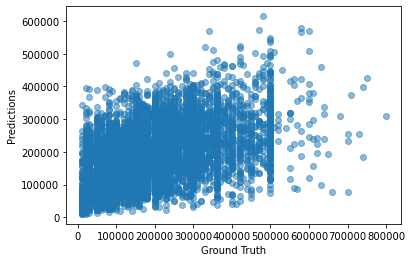

In [31]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# paremeter tuning to achieve higher accuracy of the model

In [ ]:
## features and DV: no change

In [32]:
algo = RandomForestRegressor(n_estimators=10, random_state=123)
model = algo.fit(X_train, y_train)

In [33]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.290
RMSE: 108431.241


In [34]:
r2_score(y_test,predictions)

0.2898983148772679

In [35]:
algo = RandomForestRegressor(n_estimators=15, random_state=0)
model = algo.fit(X_train, y_train)

In [36]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.313
RMSE: 106679.848


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [38]:
algo = RandomForestRegressor(n_estimators=10, random_state=123)
model = algo.fit(X_train, y_train)

In [39]:
model.score(X_train,y_train)

0.8529025651741656

In [40]:
model.score(X_test,y_test)  

0.30089885719262377

In [41]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.301
RMSE: 107254.838


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 123)

In [43]:
algo = RandomForestRegressor(n_estimators=10, random_state=123)
model = algo.fit(X_train, y_train)

In [44]:
model.score(X_train,y_train)

0.8558467266406493

In [45]:
model.score(X_test,y_test)  

0.31013030843096634

In [46]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.310
RMSE: 107684.402


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50, random_state = 123)

In [48]:
algo = RandomForestRegressor(n_estimators=15, random_state=123)
model = algo.fit(X_train, y_train)

In [49]:
model.score(X_train,y_train)

0.8677946413415134

In [50]:
model.score(X_test,y_test) 

0.3297587086338739

In [51]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.330
RMSE: 106285.698


## no improvment was achieved. 